# Titanic Project Part 4
Yuliia Nikolaenko 

Eduardo Bonnefemne

Gabriel Pérez García

Elena-Mihaela Grigore 

# Data pre-processing

In [ ]:
from google.colab import drive
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling

In [ ]:
url1 = 'https://raw.githubusercontent.com/julelnik/titanic_AI/main/train.csv'
url2 = 'https://raw.githubusercontent.com/julelnik/titanic_AI/main/test.csv'
train=pd.read_csv(url1)
test=pd.read_csv(url2)

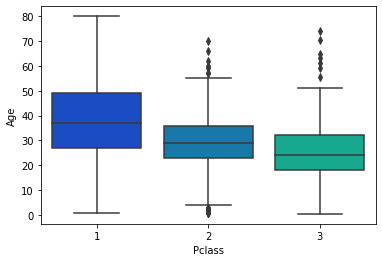

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

From this graph we can find out the mean age for each of the Pclass

In [ ]:
#filling the missing values in age varible based on the relation that has both features : 'Age' and 'Pclass'
def impute(cols):
    Age = cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [ ]:
# applying to dataset
train['Age']=train[['Age','Pclass']].apply(impute,axis=1)
test['Age']=test[['Age','Pclass']].apply(impute,axis=1)

In [ ]:
#missings in embarked filling 
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


From the dataset we can see that 2 missing values were 2 females in 1 class travelling together so we can fill in the missing values with the most frequant value for this type of the passenger.

In [ ]:
train['Embarked'] = train['Embarked'].fillna('S')

# Recoding the values

First let's take a look at the fare variable.

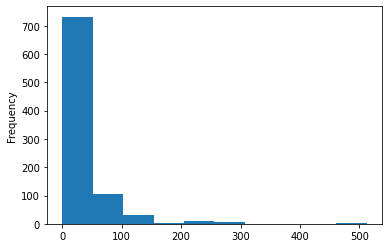

In [ ]:
train.Fare.plot(kind='hist')

In [ ]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
# recoding the Fare into 4 categories from 0 to 3 based of the price range quartiles.
def categorize(fare):
    if fare <= 7:
        return 0
    elif fare <= 14:
        return 1
    elif fare <= 31:
        return 2
    else:
        return 3

In [ ]:
#aplying to data sets
test["FareType"]= test["Fare"].apply(categorize)
train["FareType"]= train["Fare"].apply(categorize)

In [ ]:
# recording sex as binary variable 1 for female and 0 for male
def encodeSex(x):
    if x=="male":
        return 0
    if x=="female":
        return 1

In [ ]:
#applying to datasets
train['SexCode'] = train['Sex'].apply(encodeSex)
test['SexCode'] = test['Sex'].apply(encodeSex)

Let's record the age variable into categories based on....

In [ ]:
train['Age'].describe()

count    891.000000
mean      29.100079
std       13.265936
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
#Added by Eduardo 
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [ ]:
# recoding the age into 5 categories based of the age range for survived
def categorize_Age(x):
    if x <= 16:
        return 0
    elif x <= 32:
        return 1
    elif x <= 48:
        return 2
    elif x <= 64:
        return 3
    elif x <= 80:
        return 4

In [ ]:
#applying to dataset
train['Age_cat']=train['Age'].apply(categorize_Age)
test['Age_cat']=test['Age'].apply(categorize_Age)

Recoding Embarked to int categories from 0 to 2 based on the % of survived from each port (from less to more).

In [ ]:
train.groupby(by=["Embarked"])["Survived"].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

In [ ]:
train['Embarked_code'] = train['Embarked'].map( {'Q': 0, 'C': 1, 'S': 2} ).astype(int)
test['Embarked_code'] = test['Embarked'].map( {'Q': 0, 'C': 1, 'S': 2} ).astype(int)

In [ ]:
#final data set for analysis
train_cleaned = train.drop(['PassengerId','Name','Sex', 'Age', 'Fare', 'Ticket', 'Embarked', 'Cabin', 'AgeBand'], axis=1)
train_cleaned.shape

(891, 8)

In [ ]:
train_cleaned

,Survived,Pclass,SibSp,Parch,FareType,SexCode,Age_cat,Embarked_code
0,0,3,1,0,1,0,1,2
1,1,1,1,0,3,1,2,1
2,1,3,0,0,1,1,1,2
3,1,1,1,0,3,1,2,2
4,0,3,0,0,1,0,2,2
...,...,...,...,...,...,...,...,...
886,0,2,0,0,1,0,1,2
887,1,1,0,0,2,1,1,2
888,0,3,1,2,2,1,1,2
889,1,1,0,0,2,0,1,1


In [ ]:
test_cleaned = test.drop(['PassengerId','Name','Sex', 'Age', 'Fare', 'Ticket', 'Embarked', 'Cabin'], axis=1)
test_cleaned.shape

(418, 7)

In [ ]:
test_cleaned

,Pclass,SibSp,Parch,FareType,SexCode,Age_cat,Embarked_code
0,3,0,0,1,0,2,0
1,3,1,0,0,1,2,2
2,2,0,0,1,0,3,0
3,3,0,0,1,0,1,2
4,3,1,1,1,1,1,2
...,...,...,...,...,...,...,...
413,3,0,0,1,0,1,2
414,1,0,0,3,1,2,1
415,3,0,0,1,0,2,2
416,3,0,0,1,0,1,2


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import KFold, StratifiedKFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation: CROSS VALIDATION
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC


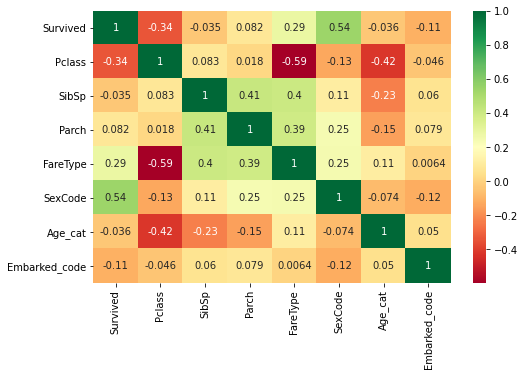

In [ ]:
# to choose the varibles for predictive model let's see the correlation 
plt.subplots(figsize=(8, 5))
sns.heatmap(train_cleaned.corr(), annot=True, cmap="RdYlGn")
plt.show()

The feautures for the model are passenager class, number of siblings , parents, partners on board, type of the fare, sex, age, Embarked port

In [ ]:
#defining the features and response for the model 
X = train_cleaned.drop(['Survived'], axis=1)
stdscale=StandardScaler()
X_scaled = stdscale.fit_transform(X)
y = train.Survived.copy()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=5)
logreg=LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy =logreg.score(X_test, y_test) 

The model predict the survival level at 85% level.




The number of correct predictions for not survived are 475 and for survived 237.

In [ ]:
# I tried this package to see details about model
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model = sm.Logit(y_test, X_test)
result = model.fit(method='newton')
result.summary()

Optimization terminated successfully.
         Current function value: 0.412976
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  223
Model:                          Logit   Df Residuals:                      216
Method:                           MLE   Df Model:                            6
Date:                Thu, 05 Nov 2020   Pseudo R-squ.:                  0.3744
Time:                        11:25:37   Log-Likelihood:                -92.094
converged:                       True   LL-Null:                       -147.21
Covariance Type:            nonrobust   LLR p-value:                 1.830e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5856      0.281     -2.084      0.037      -1.136      -0.035
x2            -0.7066      0.268     -2.639      0.008      -1.231      -0.182
x3            -0.1319      0.238     -0.555      0.579      -0.598       0.334
x4             0.8467      0.289      2.935      0.003       0.281       1.412
x5             1.4867      0.213      6.967      0.000       1.068       1.905
x6            -0.4975      0.233     -2.139      0.032      -0.953      -0.042
x7            -0.0407      0.189     -0.215      0.830      -0.412       0.331
==============================================================================
"""

### LDA

In [ ]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
Y_pred = lda.predict(X_test)
acc_lda = round(lda.score(X_train,y_train) * 100, 2)
acc_lda

78.59

In [ ]:
X = train_cleaned[['Pclass', 'SibSp', 'Parch', 'FareType', 'SexCode', 'Age_cat', 'Embarked_code']].values
y = train_cleaned['Survived'].values

from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 7) (712,)
Test set: (179, 7) (179,)


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldaModel = LinearDiscriminantAnalysis().fit(X_train,y_train)
yhat = ldaModel.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, ldaModel.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7879213483146067
Test set Accuracy:  0.8212290502793296


Text(0.5, 15.0, 'Predicted Value')

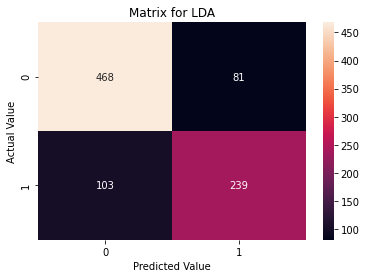

In [ ]:
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
cv_result = cross_val_score(ldaModel, X_scaled, y, cv = kfold, scoring = "accuracy")
cv_result.mean() # mean accuracy of kfold

fig=plt.subplot()
ax=plt.gca()
y_pred = cross_val_predict(ldaModel,X_scaled,y,cv=kfold)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='2.0f')
ax.set_title('Matrix for LDA')
ax.set_ylabel('Actual Value')
ax.set_xlabel('Predicted Value')

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qdaModel = QuadraticDiscriminantAnalysis().fit(X_train,y_train)
yhat = qdaModel.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, qdaModel.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7935393258426966
Test set Accuracy:  0.8268156424581006


## k-Nearest Neighbors classifier (kNN) - Gabriel Pérez

In [ ]:
train_cleaned.head(5)

,Survived,Pclass,SibSp,Parch,FareType,SexCode,Age_cat,Embarked_code
0,0,3,1,0,1,0,1,2
1,1,1,1,0,3,1,2,1
2,1,3,0,0,1,1,1,2
3,1,1,1,0,3,1,2,2
4,0,3,0,0,1,0,2,2


In [ ]:
train_cleaned.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'FareType', 'SexCode',
       'Age_cat', 'Embarked_code'],
      dtype='object')

In [ ]:
X = train_cleaned[['Pclass', 'SibSp', 'Parch', 'FareType', 'SexCode', 'Age_cat', 'Embarked_code']].values
X[:5]

array([[3, 1, 0, 1, 0, 1, 2],
       [1, 1, 0, 3, 1, 2, 1],
       [3, 0, 0, 1, 1, 1, 2],
       [1, 1, 0, 3, 1, 2, 2],
       [3, 0, 0, 1, 0, 2, 2]])

In [ ]:
y = train_cleaned['Survived'].values
y[:5]

array([0, 1, 1, 1, 0])

In [ ]:
from sklearn import preprocessing

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance. But In this case it decreases the performance of the model.

In [ ]:
#X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
#X[0:5]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 7) (712,)
Test set: (179, 7) (179,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

We can calculate the accuracy of KNN for different Ks. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

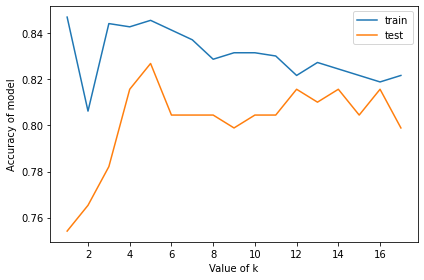

In [ ]:
N = 18
train_accuracy = []
test_accuracy = []
for k in range(1,N):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    y_hat = neigh.predict(X_test)
    train_accuracy.append(metrics.accuracy_score(y_train, neigh.predict(X_train)))
    test_accuracy.append(metrics.accuracy_score(y_test, y_hat))

plt.plot(range(1,N), train_accuracy, label='train')
plt.plot(range(1,N), test_accuracy, label='test')
plt.legend(loc='best')
plt.xlabel('Value of k')
plt.ylabel('Accuracy of model')
plt.tight_layout()
plt.show()

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.75418994, 0.76536313, 0.78212291, 0.81564246, 0.82681564,
       0.80446927, 0.80446927, 0.80446927, 0.79888268])

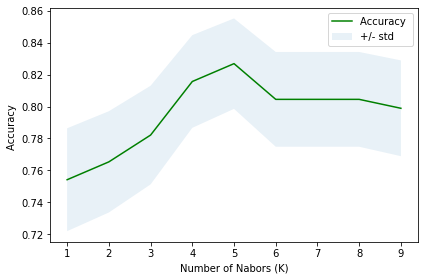

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was 0.8268156424581006 with k= 5


In [ ]:
k = 5
#Train Model and Predict  
knn_model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
yhat = knn_model.predict(X_test)
yhat[0:5]

array([0, 0, 1, 0, 0])

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8455056179775281
Test set Accuracy:  0.8268156424581006


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 42  18]
 [ 13 106]]


Confusion matrix, without normalization
[[ 42  18]
 [ 13 106]]


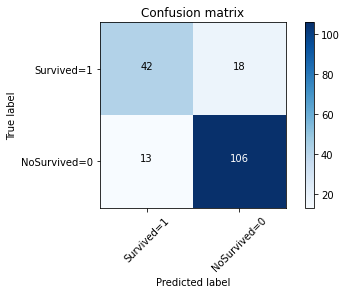

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1','NoSurvived=0'],normalize= False,  title='Confusion matrix')

Matthews Correlation Coefitient confirm that k = 8 gives the best results

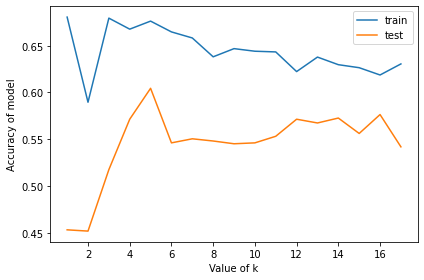

In [ ]:
N = 18
train_mcc = []
test_mcc = []
for k in range(1,N):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    y_hat = neigh.predict(X_test)
    train_mcc.append(metrics.matthews_corrcoef(y_train, neigh.predict(X_train)))
    test_mcc.append(metrics.matthews_corrcoef(y_test, y_hat))

plt.plot(range(1,N), train_mcc, label='train')
plt.plot(range(1,N), test_mcc, label='test')
plt.legend(loc='best')
plt.xlabel('Value of k')
plt.ylabel('Accuracy of model')
plt.tight_layout()
plt.show()

## Model Comparison

In [ ]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [ ]:
y_KNN_hat = knn_model.predict(X_test)
y_LDA_hat = ldaModel.predict(X_test)
y_QDA_hat = qdaModel.predict(X_test)
y_LR_hat = logreg.predict(X_test)

In [ ]:
print("F1 of KNN: ", f1_score(y_test, y_KNN_hat, average='weighted'))
print("F1 of LDA: ", f1_score(y_test, y_LDA_hat, average='weighted'))
print("F1 of QDA: ", f1_score(y_test, y_QDA_hat, average='weighted'))
print("F1 of LR: ", f1_score(y_test, y_LR_hat, average='weighted'))

print("Jaccard of KNN: ", jaccard_similarity_score(y_test, y_KNN_hat))
print("Jaccard of LDA: ", jaccard_similarity_score(y_test, y_LDA_hat))
print("Jaccard of QDA: ", jaccard_similarity_score(y_test, y_QDA_hat))
print("Jaccard of LR: ", jaccard_similarity_score(y_test, y_LR_hat))

F1 of KNN:  0.8248324971937097
F1 of LDA:  0.8187225550826419
F1 of QDA:  0.8271659124562674
F1 of LR:  0.5309512204266806
Jaccard of KNN:  0.8268156424581006
Jaccard of LDA:  0.8212290502793296
Jaccard of QDA:  0.8268156424581006
Jaccard of LR:  0.664804469273743


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
from sklearn.metrics import log_loss
yhat_LR_prob = logreg.predict_proba(X_test)
print("Log loss of LR: ", log_loss(y_test, yhat_LR_prob))

Log loss of LR:  0.9180612638257309


## Comparison Table

| Algorithm | Accuracy/Jaccard | F1-score | Logloss|
| --- | --- | --- | --- |
| kNN | 0.8435 | 0.8386 | NA|
| LDA | 0.8268 | 0.8229 | NA|
| QDA | 0.8324 | 0.8324 | NA|
| LR | 0.6648 | 0.5309 | 0.9487|

## Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(knn_model, X_test, y_KNN_hat, n_repeats=10, random_state=0)
result

{'importances': array([[0.09, 0.12, 0.06, 0.09, 0.08, 0.09, 0.05, 0.08, 0.12, 0.13],
        [0.08, 0.11, 0.07, 0.06, 0.05, 0.09, 0.08, 0.11, 0.08, 0.08],
        [0.11, 0.12, 0.09, 0.12, 0.08, 0.09, 0.09, 0.1 , 0.08, 0.09],
        [0.15, 0.16, 0.13, 0.13, 0.17, 0.18, 0.12, 0.11, 0.16, 0.16],
        [0.25, 0.24, 0.27, 0.28, 0.27, 0.28, 0.27, 0.26, 0.27, 0.25],
        [0.11, 0.07, 0.09, 0.07, 0.07, 0.08, 0.08, 0.08, 0.07, 0.08],
        [0.08, 0.08, 0.1 , 0.07, 0.08, 0.04, 0.09, 0.08, 0.08, 0.07]]),
 'importances_mean': array([0.09, 0.08, 0.1 , 0.15, 0.26, 0.08, 0.08]),
 'importances_std': array([0.03, 0.02, 0.01, 0.02, 0.01, 0.01, 0.01])}

In [ ]:
indices = np.argsort(result.importances_mean)[::-1]
indices

array([4, 3, 2, 0, 1, 5, 6])

In [ ]:
features = ['Pclass', 'SibSp', 'Parch', 'FareType', 'SexCode', 'Age_cat', 'Embarked_code']

In [ ]:
result.importances_mean[indices]

array([0.26, 0.15, 0.1 , 0.09, 0.08, 0.08, 0.08])

In [ ]:
result.importances_std[indices]

array([0.01, 0.02, 0.01, 0.03, 0.02, 0.01, 0.01])

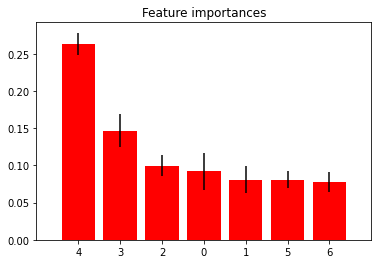

In [ ]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), result.importances_mean[indices],
        color="r", yerr=result.importances_std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Assignment 3

### 3.1 Effect of sample size ###

### 3.2 Building models using various subsets of attributes ###

We have 7 atttributes based on which we can predict out dependent variable (the survival rate):  
'Pclass',  
'SibSp',  
'Parch',  
'FareType',  
'SexCode',  
'Age_cat',  
'Embarked_code'

In [ ]:
train_cleaned.head(1)

,Survived,Pclass,SibSp,Parch,FareType,SexCode,Age_cat,Embarked_code
0,0,3,1,0,1,0,1,2


In [ ]:
X_train_cleaned = train_cleaned.drop(axis=1, columns=['Survived'])

In [ ]:
'''
Variables we set to specific values:
- k_neigh = the number of neighbors to consider for the kNN algorithm (we know from previous tests that kNN gave best results for k=5)
- splits = the number of folds into which our test data is divided for cross validation. 
'''
k_neigh = 5
splits  = 5

j=0
from itertools import combinations 

features = ['Pclass', 'SibSp', 'Parch', 'FareType', 'SexCode', 'Age_cat', 'Embarked_code']
features_idx = list(range(0,len(features)))

test_lr_acc  = {}
test_lr_mcc  = {}
test_lr_bas  = {}
test_lr_sensi = {}
test_lr_spec = {}
kfold_lr_mean_acc = {}

test_knn_acc = {}
test_knn_mcc = {}
test_knn_bas = {}
test_knn_sensi = {}
test_knn_spec = {}
kfold_knn_mean_acc = {}

test_lda_acc = {}
test_lda_mcc = {}
test_lda_bas = {}
test_lda_sensi = {}
test_lda_spec = {}
kfold_lda_mean_acc = {}

for k in range(1,len(features)):
  print(f'Combinations of {k}')
  
  #Get a list of combinations of 'k' attributes
  features_subset = list(combinations(features_idx,k))
  print(f'Feature subset: {features_subset}')
  
  #For each combination of k attributes, build a model and make predictions
  for i in range(0,len(features_subset)):
    j+=1  
    #extract only the features we selected for the current combination of k features
    X_train_sub = X_train_cleaned.iloc[:,list(features_subset[i])]

    #Scale features to unit variance
    stdscale=StandardScaler()
    X_scaled = stdscale.fit_transform(X_train_sub)

    y = train_cleaned.Survived.copy()
    
    #Perform the usual train-test split 
    #Select 75% of our data for training and leave 25% out for testing our model
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=5)
    
    ## Logistic Regression ##
    #fit the model
    logreg=LogisticRegression()
    logreg.fit(X_train, y_train)
    
    #make predictions
    y_pred = logreg.predict(X_test)

    #get the accuracy of predictions on the test set for Logistic Regression
    accuracy =logreg.score(X_test, y_test) 

    #Matthews correlation coefficient
    mcc = metrics.matthews_corrcoef(y_test, y_pred)

    #Balance Accuracy Score
    bas = metrics.balanced_accuracy_score(y_test, y_pred)

    #Sensitivity and Specificity
    cm = confusion_matrix(y_test, y_pred)
    '''
    true negatives is :math:`C_{0,0}`, 
    false negatives is :math:`C_{1,0}`, 
    
    true positives is :math:`C_{1,1}`
    false positives is :math:`C_{0,1}`
    '''
    sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    
    test_lr_acc[features_subset[i]] = accuracy
    test_lr_mcc[features_subset[i]] = mcc
    test_lr_bas[features_subset[i]] = bas
    test_lr_sensi[features_subset[i]] = sensitivity
    test_lr_spec[features_subset[i]] = specificity

    ## kNN ##
    #train the model
    knn_model = KNeighborsClassifier(n_neighbors = k_neigh).fit(X_train,y_train)
    
    #make predictions
    y_pred = knn_model.predict(X_test)

    #get the accuracy of predictions on the test set for kNN
    accuracy = metrics.accuracy_score(y_test, y_pred)

    #Matthews correlation coefficient
    mcc = metrics.matthews_corrcoef(y_test, y_pred)

    #Balance Accuracy Score
    bas = metrics.balanced_accuracy_score(y_test, y_pred)

    #Sensitivity and Specificity
    cm = confusion_matrix(y_test, y_pred)
    sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])

    test_knn_acc[features_subset[i]] = accuracy
    test_knn_mcc[features_subset[i]] = mcc
    test_knn_bas[features_subset[i]] = bas
    test_knn_sensi[features_subset[i]] = sensitivity
    test_knn_spec[features_subset[i]] = specificity

    ## LDA ##
    #train the model
    lda_model = LinearDiscriminantAnalysis().fit(X_train,y_train)
    
    #make predictions
    y_pred = lda_model.predict(X_test)

    #get the accuracy of predictions on the test set for kNN
    accuracy = metrics.accuracy_score(y_test, y_pred)

    #Matthews correlation coefficient
    mcc = metrics.matthews_corrcoef(y_test, y_pred)

    #Balance Accuracy Score
    bas = metrics.balanced_accuracy_score(y_test, y_pred)

    #Sensitivity and Specificity
    cm = confusion_matrix(y_test, y_pred)
    sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])

    test_lda_acc[features_subset[i]] = accuracy
    test_lda_mcc[features_subset[i]] = mcc
    test_lda_bas[features_subset[i]] = bas
    test_lda_sensi[features_subset[i]] = sensitivity
    test_lda_spec[features_subset[i]] = specificity

    kfold = KFold(n_splits=splits, shuffle = True, random_state=1) # split the data into n_splits equal parts
    cv_result_logreg = cross_val_score(logreg, X_scaled, y, cv = kfold, scoring = "accuracy")
    cv_result_knn = cross_val_score(knn_model, X_scaled, y, cv = kfold, scoring = "accuracy")
    cv_result_lda = cross_val_score(lda_model, X_scaled, y, cv = kfold, scoring = "accuracy")

    kfold_lr_mean_acc[features_subset[i]] = cv_result_logreg.mean()
    kfold_knn_mean_acc[features_subset[i]] = cv_result_knn.mean()
    kfold_lda_mean_acc[features_subset[i]] = cv_result_lda.mean()


Combinations of 1
Feature subset: [(0,), (1,), (2,), (3,), (4,), (5,), (6,)]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Combinations of 2
Feature subset: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Combinations of 3
Feature subset: [(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 1, 6), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 2, 6), (0, 3, 4), (0, 3, 5), (0, 3, 6), (0, 4, 5), (0, 4, 6), (0, 5, 6), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 2, 6), (1, 3, 4), (1, 3, 5), (1, 3, 6), (1, 4, 5), (1, 4, 6), (1, 5, 6), (2, 3, 4), (2, 3, 5), (2, 3, 6), (2, 4, 5), (2, 4, 6), (2, 5, 6), (3, 4, 5), (3, 4, 6), (3, 5, 6), (4, 5, 6)]
Combinations of 4
Feature subset: [(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 2, 5), (0, 1, 2, 6), (0, 1, 3, 4), (0, 1, 3, 5), (0, 1, 3, 6), (0, 1, 4, 5), (0, 1, 4, 6), (0, 1, 5, 6), (0, 2, 3, 4), (0, 2, 3, 5), (0, 2, 3, 6), (0, 2, 4, 5), (0, 2, 4, 6), (0, 2, 5, 6), (0, 3, 4, 5), (0, 3, 4, 6), (0, 3, 5, 6), (0, 4, 5, 6), (1, 2, 3, 4), (1, 2, 3, 5), (1, 2, 3, 6), (1, 2, 4, 5), (1, 2, 4, 6), (1, 2, 5, 6), (1, 3, 4, 5), (1, 3, 4, 6), (1, 3, 5, 6), (1, 4, 5, 6), (2, 3, 4, 5), (2, 3, 4, 6), (2, 3, 5, 6), (2, 4, 5, 6), (3, 4, 5, 6)]
Combinations of 5
Feature subset: [(0, 1, 2, 3, 4), (0,

In [ ]:
#Sanity check: print all results to prevent bugs
print(test_lr_acc)
print(test_lr_mcc)
print(test_lr_bas)
print(test_knn_acc)
print(test_knn_mcc)
print(test_knn_bas)
print(test_lda_acc)
print(test_lda_mcc)
print(test_lda_bas)

feat = np.array(features)

import operator
print("\n------ Logistic Regression ------")
print("The subset of attributes for wich the maximum accuracy was achieved")
print(max(test_lr_acc.items(), key=operator.itemgetter(1)))
print(f'Best performing attributes: {feat[(list(max(test_lr_acc.items(), key=operator.itemgetter(1))[0]))]}\n')

print("The subset of attributes for wich the maximum MCC was achieved")
print(max(test_lr_mcc.items(), key=operator.itemgetter(1)))
print(f'Best performing attributes: {feat[(list(max(test_lr_mcc.items(), key=operator.itemgetter(1))[0]))]}\n')

print("The subset of attributes for wich the maximum Balanced Accuracy was achieved")
print(max(test_lr_bas.items(), key=operator.itemgetter(1)))
print(f'Best performing attributes: {feat[(list(max(test_lr_bas.items(), key=operator.itemgetter(1))[0]))]}\n')

print("The subset of attributes for wich the maximum Sensitivity was achieved")
print(max(test_lr_sensi.items(), key=operator.itemgetter(1)))
print(f'Best performing attributes: {feat[(list(max(test_lr_sensi.items(), key=operator.itemgetter(1))[0]))]}\n')

print("The subset of attributes for wich the maximum Specificity was achieved")
print(max(test_lr_spec.items(), key=operator.itemgetter(1)))
print(f'Best performing attributes: {feat[(list(max(test_lr_spec.items(), key=operator.itemgetter(1))[0]))]}\n')

print("The subset of attributes for wich the maximum Mean Accuracy was achieved with cross-validation")
print(max(kfold_lr_mean_acc.items(), key=operator.itemgetter(1)))
print(f'Best performing attributes: {feat[(list(max(kfold_lr_mean_acc.items(), key=operator.itemgetter(1))[0]))]}\n')


print("------ kNN (k=5) ------")
print("The subset of attributes for wich the maximum accuracy was achieved")
print(max(test_knn_acc.items(), key=operator.itemgetter(1)))
print(f'Best performing attributes: {feat[(list(max(test_knn_acc.items(), key=operator.itemgetter(1))[0]))]}\n')

print("The subset of attributes for wich the maximum MCC was achieved")
print(max(test_knn_mcc.items(), key=operator.itemgetter(1)))
print(f'Best performing attributes: {feat[(list(max(test_knn_mcc.items(), key=operator.itemgetter(1))[0]))]}\n')

print("The subset of attributes for wich the maximum Balanced Accuracy was achieved")
print(max(test_knn_bas.items(), key=operator.itemgetter(1)))
print(f'Best performing attributes: {feat[(list(max(test_knn_bas.items(), key=operator.itemgetter(1))[0]))]}\n')

print("The subset of attributes for wich the maximum Sensitivity was achieved")
print(max(test_knn_sensi.items(), key=operator.itemgetter(1)))
print(f'Best performing attributes: {feat[(list(max(test_knn_sensi.items(), key=operator.itemgetter(1))[0]))]}\n')

print("The subset of attributes for wich the maximum Specificity was achieved")
print(max(test_knn_spec.items(), key=operator.itemgetter(1)))
print(f'Best performing attributes: {feat[(list(max(test_knn_spec.items(), key=operator.itemgetter(1))[0]))]}\n')

print("The subset of attributes for wich the maximum Mean Accuracy was achieved with cross-validation")
print(max(kfold_knn_mean_acc.items(), key=operator.itemgetter(1)))
print(f'Best performing attributes: {feat[(list(max(kfold_knn_mean_acc.items(), key=operator.itemgetter(1))[0]))]}\n')


print("\n------ Linear Discriminat Analysis ------")
print("The subset of attributes for wich the maximum accuracy was achieved")
print(max(test_lda_acc.items(), key=operator.itemgetter(1)))
print(f'Best performing attributes: {feat[(list(max(test_lda_acc.items(), key=operator.itemgetter(1))[0]))]}\n')

print("The subset of attributes for wich the maximum MCC was achieved")
print(max(test_lda_mcc.items(), key=operator.itemgetter(1)))
print(f'Best performing attributes: {feat[(list(max(test_lda_mcc.items(), key=operator.itemgetter(1))[0]))]}\n')

print("The subset of attributes for wich the maximum Balanced Accuracy was achieved")
print(max(test_lda_bas.items(), key=operator.itemgetter(1)))
print(f'Best performing attributes: {feat[(list(max(test_lda_bas.items(), key=operator.itemgetter(1))[0]))]}\n')

print("The subset of attributes for wich the maximum Sensitivity was achieved")
print(max(test_lda_sensi.items(), key=operator.itemgetter(1)))
print(f'Best performing attributes: {feat[(list(max(test_lda_sensi.items(), key=operator.itemgetter(1))[0]))]}\n')

print("The subset of attributes for wich the maximum Specificity was achieved")
print(max(test_lda_spec.items(), key=operator.itemgetter(1)))
print(f'Best performing attributes: {feat[(list(max(test_lda_spec.items(), key=operator.itemgetter(1))[0]))]}\n')

print("The subset of attributes for wich the maximum Mean Accuracy was achieved with cross-validation")
print(max(kfold_lda_mean_acc.items(), key=operator.itemgetter(1)))
print(f'Best performing attributes: {feat[(list(max(kfold_lda_mean_acc.items(), key=operator.itemgetter(1))[0]))]}\n')


print(f'All attributes: {features}')

{(0,): 0.726457399103139, (1,): 0.6278026905829597, (2,): 0.6188340807174888, (3,): 0.6860986547085202, (4,): 0.8116591928251121, (5,): 0.6278026905829597, (6,): 0.600896860986547, (0, 1): 0.726457399103139, (0, 2): 0.7309417040358744, (0, 3): 0.7174887892376681, (0, 4): 0.8116591928251121, (0, 5): 0.6816143497757847, (0, 6): 0.726457399103139, (1, 2): 0.6322869955156951, (1, 3): 0.7130044843049327, (1, 4): 0.820627802690583, (1, 5): 0.6278026905829597, (1, 6): 0.6053811659192825, (2, 3): 0.6860986547085202, (2, 4): 0.8116591928251121, (2, 5): 0.6233183856502242, (2, 6): 0.5964125560538116, (3, 4): 0.8116591928251121, (3, 5): 0.6905829596412556, (3, 6): 0.6771300448430493, (4, 5): 0.8116591928251121, (4, 6): 0.8116591928251121, (5, 6): 0.600896860986547, (0, 1, 2): 0.7309417040358744, (0, 1, 3): 0.7219730941704036, (0, 1, 4): 0.8295964125560538, (0, 1, 5): 0.695067264573991, (0, 1, 6): 0.726457399103139, (0, 2, 3): 0.7309417040358744, (0, 2, 4): 0.8161434977578476, (0, 2, 5): 0.7130044

### 3.2.1 Best metrics by algorithm type and metrics used for comparison

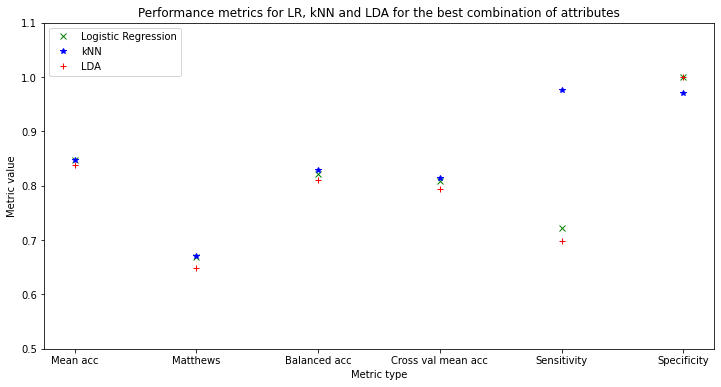

In [ ]:
lr_metrics = [max(test_lr_acc.items(), key=operator.itemgetter(1))[1], max(test_lr_mcc.items(), key=operator.itemgetter(1))[1], max(test_lr_bas.items(), key=operator.itemgetter(1))[1], max(kfold_lr_mean_acc.items(), key=operator.itemgetter(1))[1], max(test_lr_sensi.items(), key=operator.itemgetter(1))[1], max(test_lr_spec.items(), key=operator.itemgetter(1))[1]]
knn_metrics = [max(test_knn_acc.items(), key=operator.itemgetter(1))[1], max(test_knn_mcc.items(), key=operator.itemgetter(1))[1], max(test_knn_bas.items(), key=operator.itemgetter(1))[1], max(kfold_knn_mean_acc.items(), key=operator.itemgetter(1))[1], max(test_knn_sensi.items(), key=operator.itemgetter(1))[1], max(test_knn_spec.items(), key=operator.itemgetter(1))[1]] 
lda_metrics = [max(test_lda_acc.items(), key=operator.itemgetter(1))[1], max(test_lda_mcc.items(), key=operator.itemgetter(1))[1], max(test_lda_bas.items(), key=operator.itemgetter(1))[1], max(kfold_lda_mean_acc.items(), key=operator.itemgetter(1))[1], max(test_lda_sensi.items(), key=operator.itemgetter(1))[1], max(test_lda_spec.items(), key=operator.itemgetter(1))[1]] 

#x = np.linspace(0, 5, 6)
x = ['Mean acc', 'Matthews', 'Balanced acc', 'Cross val mean acc', 'Sensitivity', 'Specificity']

fig = plt.figure(figsize=(12,6))

plt.xlabel('Metric type')
plt.ylabel('Metric value')
plt.ylim(0.5, 1.1)

plt.title('Performance metrics for LR, kNN and LDA for the best combination of attributes')

plt.plot(x,lr_metrics, 'gx', label='Logistic Regression')
plt.plot(x,knn_metrics, 'b*', label='kNN')
plt.plot(x,lda_metrics, 'r+', label='LDA')

plt.legend(loc='upper left')


### 3.3 Effect of threshold selection ###

At this point we know:  
- what is the optimum number of folds (fom section 3.1)
- what are the best attributes to train our model on (from section 3.2)

Next we want to find out what is the best **threshold**.


In [ ]:
features = ['Pclass', 'SibSp', 'Parch', 'FareType', 'SexCode', 'Age_cat', 'Embarked_code']
feat = np.array(features)
selected_features = feat[(list(max(test_lr_acc.items(), key=operator.itemgetter(1))[0]))]

X_train_sub = X_train_cleaned.iloc[:,list(max(test_lr_acc.items(), key=operator.itemgetter(1))[0])]

#Scale features to unit variance
stdscale=StandardScaler()
X_scaled = stdscale.fit_transform(X_train_sub)

y = train_cleaned.Survived.copy()

#Perform the usual train-test split 
#Select 75% of our data for training and leave 25% out for testing our model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=5)

## Logistic Regression ##
#fit the model
logreg=LogisticRegression()
logreg.fit(X_train, y_train)

s_array = np.arange(0.1,0.9,0.01)
idx = 0
sensitivity = []
specificity = []
sensitivity1 = []
specificity1 = []
pos = []
neg = []
for s in s_array:
  y_pred_s = np.where(logreg.predict_proba(X_test)[:,1] > s, 1, 0)
  cm = confusion_matrix(y_test, y_pred_s)
  '''
  true negatives is :math:`C_{0,0}`, 
  false negatives is :math:`C_{1,0}`, 
   
  true positives is :math:`C_{1,1}`
  false positives is :math:`C_{0,1}`
  '''
  #sensitivity.append(cm[0,1]/(cm[0,1]+cm[1,0])) #wrong
  #specificity.append(cm[0,0]/(cm[0,0]+cm[1,1])) #wrong

  sensitivity.append(cm[1,1]/(cm[1,1]+cm[1,0]))
  specificity.append(cm[0,0]/(cm[0,0]+cm[0,1]))
  
  pos.append(sum(y_pred_s==1))
  neg.append(sum(y_pred_s==0))
  #print(cm)

#sanity checks
y_pred = logreg.predict(X_test)  #predict for default 0.5 threshold
y_pred_prob = logreg.predict_proba(X_test) #get the probabilities of predictions

### 3.3.1 Specificity / Sensitivity as a function of threshold ###

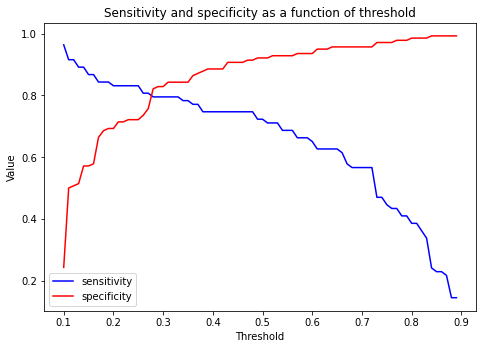

In [ ]:
#Mihaela: This is not required, I was looking at this out of curiosity
fig = plt.figure()

axes = fig.add_axes([0.0, 0.0, 1, 1]) # left, bottom, width, height (range 0 to 1)

axes.plot(s_array, sensitivity, 'b', label='sensitivity')
axes.plot(s_array, specificity, 'r', label='specificity')
axes.legend()
axes.set_xlabel('Threshold')
axes.set_ylabel('Value')
axes.set_title('Sensitivity and specificity as a function of threshold')
plt.show()

### 3.3.2 Examining the score distributions for the two classes ###

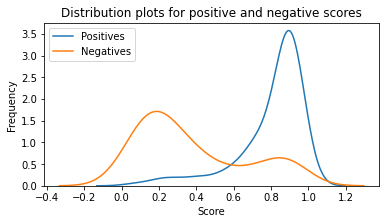

In [ ]:
#Mihaela: 
import warnings
warnings.filterwarnings("ignore")

scores_for_negatives = y_pred_prob[y_test==1][:,0]
scores_for_positives = y_pred_prob[y_test==0][:,0]

#sns.set_style(style='darkgrid')
plt.figure(figsize=(6,3))
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution plots for positive and negative scores')

sns.distplot(scores_for_positives, label='Positives', hist=False)
sns.distplot(scores_for_negatives, label='Negatives', hist=False)
plt.legend(loc='best')

## Selecting k for k-Fold Cross Validation 

0.8013432929508506
0.7766618542464377
0.7878727010231625


Text(0.5, 15.0, 'Predicted Value')

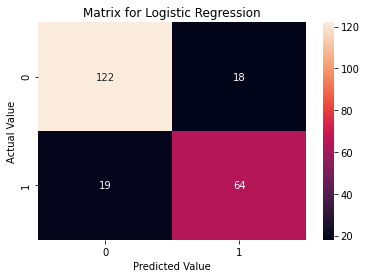

In [ ]:
#Kfold
logreg = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors=5)
lda = LinearDiscriminantAnalysis()

lr_df = X_train_cleaned[['Pclass', 'SibSp', 'FareType', 'SexCode', 'Age_cat', 'Embarked_code']].values
knn_df = X_train_cleaned[['SibSp', 'Parch', 'FareType', 'SexCode', 'Age_cat']].values
lda_df = X_train_cleaned[['Pclass', 'SibSp', 'SexCode', 'Age_cat']].values


kfold = KFold(n_splits=5, shuffle = True, random_state=1) # k=10, split the data into 10 equal parts
cv_result_logreg = cross_val_score(logreg, lr_df, y, cv = kfold, scoring = "accuracy")
cv_result_knn = cross_val_score(knn_model, knn_df, y, cv = kfold, scoring = "accuracy")
cv_result_lda = cross_val_score(lda, lda_df, y, cv = kfold, scoring = "accuracy")

print(cv_result_logreg.mean()) # mean accuracy of kfold
print(cv_result_knn.mean()) # mean accuracy of kfold
print(cv_result_lda.mean()) # mean accuracy of kfold


fig=plt.subplot()
ax=plt.gca()
y_pred = cross_val_predict(logreg,X_test,y_test,cv=kfold)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2.0f')
ax.set_title('Matrix for Logistic Regression')
ax.set_ylabel('Actual Value')
ax.set_xlabel('Predicted Value')

### ROC curve

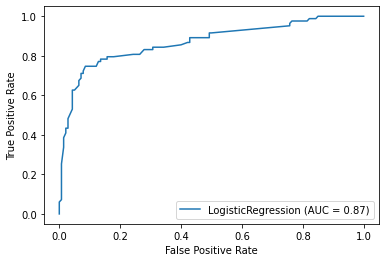

In [ ]:

X_train_sub = X_train_cleaned.iloc[:,list(max(test_lr_mcc.items(), key=operator.itemgetter(1))[0])]

#Scale features to unit variance
stdscale=StandardScaler()
X_scaled = stdscale.fit_transform(X_train_sub)

y = train_cleaned.Survived.copy()

#Perform the usual train-test split 
#Select 75% of our data for training and leave 25% out for testing our model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=5)

logreg.fit(X_train, y_train)
metrics.plot_roc_curve(logreg, X_test, y_test)
plt.show()  

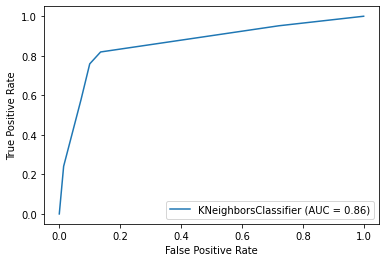

In [ ]:
X_train_sub = X_train_cleaned.iloc[:,list(max(test_knn_mcc.items(), key=operator.itemgetter(1))[0])]

#Scale features to unit variance
stdscale=StandardScaler()
X_scaled = stdscale.fit_transform(X_train_sub)

y = train_cleaned.Survived.copy()

#Perform the usual train-test split 
#Select 75% of our data for training and leave 25% out for testing our model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=5)

knn_model.fit(X_train, y_train)
metrics.plot_roc_curve(knn_model, X_test, y_test)
plt.show() 

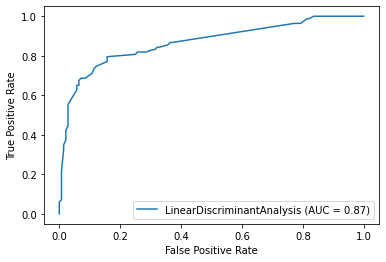

In [ ]:
X_train_sub = X_train_cleaned.iloc[:,list(max(test_lda_mcc.items(), key=operator.itemgetter(1))[0])]

#Scale features to unit variance
stdscale=StandardScaler()
X_scaled = stdscale.fit_transform(X_train_sub)

y = train_cleaned.Survived.copy()

#Perform the usual train-test split 
#Select 75% of our data for training and leave 25% out for testing our model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=5)

lda.fit(X_train, y_train)
metrics.plot_roc_curve(lda, X_test, y_test)
plt.show() 

In [ ]:
train_cleaned.groupby(by=["Survived"]).count()

,Pclass,SibSp,Parch,FareType,SexCode,Age_cat,Embarked_code
Survived,,,,,,,
0,549,549,549,549,549,549,549
1,342,342,342,342,342,342,342


# Assignment 4

In [ ]:
#defining the features and response for the model 
X = train_cleaned.drop(['Survived'], axis=1)
stdscale=StandardScaler()
X_scaled = stdscale.fit_transform(X)
y = train.Survived.copy()

## 4.1 Decision Trees


### 1. Explore results with default parameters ###

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)
dtree = DecisionTreeClassifier()

print(dtree.fit(X_train, y_train))

train_accuracy = dtree.score(X_train, y_train)

predictions = dtree.predict(X_test)
print(f'Training accuracy: {round(train_accuracy,3)}')
print(confusion_matrix(y_test,predictions))
print('\n')
report = classification_report(y_test,predictions)
print(classification_report(y_test,predictions))
print(f'Testin accuracy: ')


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Training accuracy: 0.897
[[132  22]
 [ 40  74]]


              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.77      0.65      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.77       268

Testin accuracy: 


Conclusion: our decision tree model does not generalize well.

### 2. Cross-validation ###

The default decision tree has much lower accuracy for test than for training data.  
Let's try a **5-fold cross-validation** to see what we get.  
Maybe in the train-test split we obtain those results by pure chance..

In [ ]:
from numpy import mean
from numpy import std

from sklearn.model_selection import KFold, cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# create model
kfoldtree = DecisionTreeClassifier()

# evaluate model
scores = cross_val_score(kfoldtree, X_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance

print(f'Accuracy for all folds: {scores}')
print(f'Mean accuracy: {round(mean(scores),2)}')
print(f'Standard deviation: {round(std(scores),2)}')

Accuracy for all folds: [0.77 0.77 0.78 0.8  0.78]
Mean accuracy: 0.78
Standard deviation: 0.01


Observation: We see that accuracy is almost the same as in the regular train-test split

### 3. Decision Tree visualisation ###

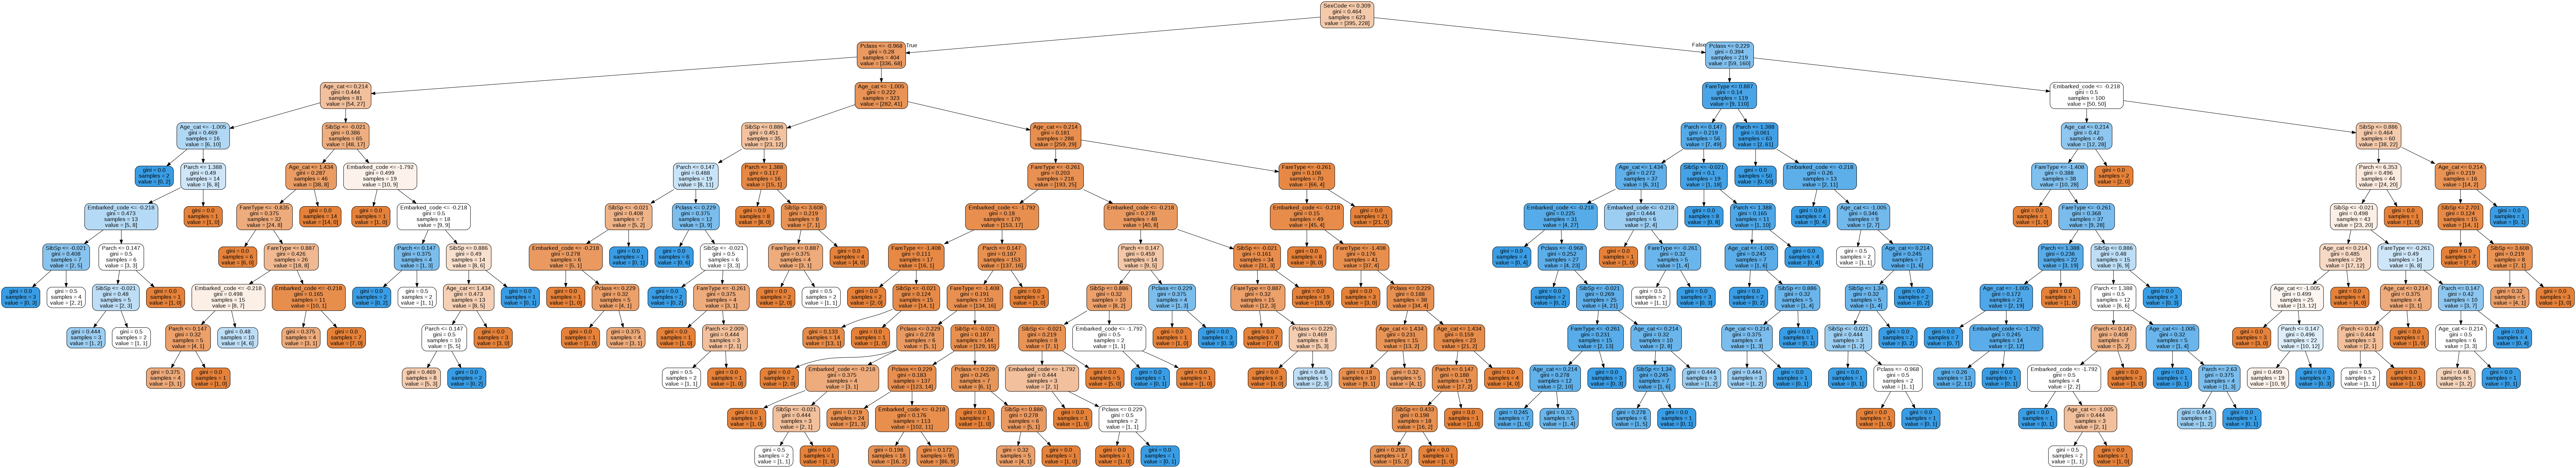

In [ ]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(train_cleaned.drop(columns='Survived', axis=1).columns)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

### 4. Overfitting ###

What we know from theory: if test accuracy is very different from train accuracy, we might have been overfitting.   

To avoid overfitting decision trees, we use:  
- Setting max depth
- Setting min number of samples at leaf nodes
- Pruning


### 5. Decistion trees: the effect of max depth on accuracy for train and test sets ###

for Max depth from [3,14]    
  - train k-fold cross-validation decision tree
  - get mean accuracy for train and test data

Plot the mean accuracy and its standard error, for both training and testing. 

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

def max_depth_swipe(global_max_depth = 15, folds = 5):
  '''
  retain the accuracy for test and train in a 3D array
  lines:
    0 - train
    1 - test
  columns:
    iteration through kfolds (the number of folds is set in the variable above)
  depth of array:
    from min to max depth of our Trees  
  '''
  accuracy = np.zeros((2, folds, global_max_depth), dtype=float)

  #we are only interested in depth 3 -> 14 (incl.)
  for d in range(3,15):
    # create the tree model and set max depth
    kfoldtree = DecisionTreeClassifier(max_depth=d)

    cv = KFold(folds, random_state=1, shuffle=True)

    '''
    for scoring, we select 'accuracy'
    there are many other options for the scoring parameter, detailed here: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    '''
    cv_results = cross_validate(kfoldtree, X_scaled, y, scoring='accuracy', cv=cv, return_train_score=True)

    '''
    cv_results contains: fit_time, score_time, test_score and train_score. 
    we are only interested in the last two
    '''
    accuracy[0,:,d] = cv_results['train_score']
    accuracy[1,:,d] = cv_results['test_score']

  accuracy_mean = np.mean(accuracy, axis=1)
  accuracy_std = np.std(accuracy, axis=1)

  fig = plt.figure(figsize=(10,8))
  x = np.arange(global_max_depth)
  plt.errorbar(x[3:], accuracy_mean[0,3:], accuracy_std[0,3:], marker='^', capsize=5, label='train')
  plt.errorbar(x[3:], accuracy_mean[1,3:], accuracy_std[1,3:], marker='x', capsize=5, label='test')
  plt.legend(fontsize=14)

  plt.xlabel('Maximum depth param for the decision tree tree', fontsize=14)
  plt.xlim([2.5,15])

  plt.ylabel(f'Mean accuracy ({folds}-fold cross validation)', fontsize=14)
  plt.ylim([np.min(accuracy_mean[:,3:])-0.1,1])

  plt.title(f'Mean accuracy versus max tree depth ({folds}-fold cross-validation)', fontsize=18)

  plt.show()

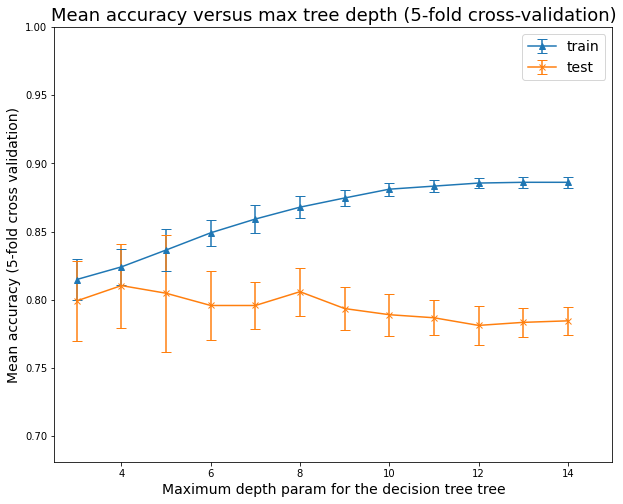

In [ ]:
#5-fold cross validation, global maximum for max depth is 15
max_depth_swipe(15,5)

### 6. Decision Trees - effect of number of folds on train and test accuracy ###

10-fold corss-validation shows the same pattern as 5-fold cross-validation

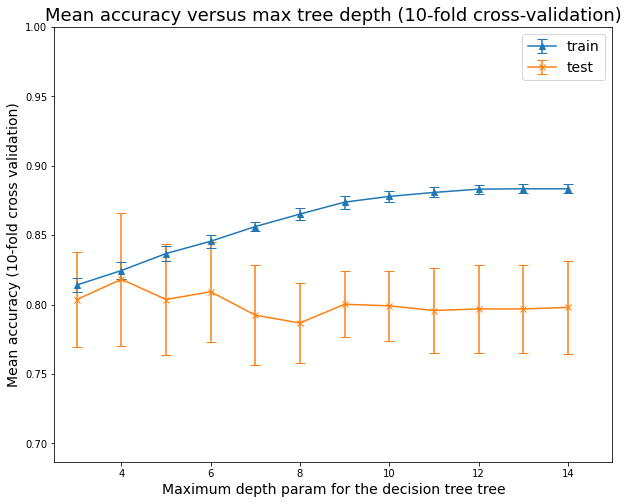

In [ ]:
#Do we notice any difference if we perform a 10-fold cross-validation ?
max_depth_swipe(15,10)

### 7. Effect of min_samples_split ###

### 7.1 Min samples split effect ###

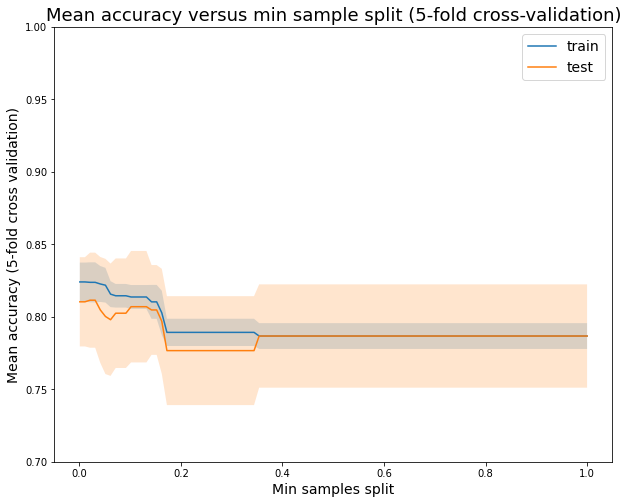

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

folds = 5
min_samples_splits = np.linspace(0.001, 1, 100, endpoint=True)

'''
retain the accuracy for test and train in a 3D array
lines:
  0 - train
  1 - test
columns:
  iteration through kfolds (the number of folds is set in the variable above)
depth of array:
  from min to max depth of our Trees  
'''
accuracy = np.zeros((2, folds, min_samples_splits.shape[0]), dtype=float)

i=0
#we are only interested in depth 3 -> 14 (incl.)
for min_samples_split in min_samples_splits:
  # create the tree model and set max depth
  kfoldtree = DecisionTreeClassifier(min_samples_split=min_samples_split, max_depth=4)

  cv = KFold(folds, random_state=1, shuffle=True)

  cv_results = cross_validate(kfoldtree, X_scaled, y, scoring='accuracy', cv=cv, return_train_score=True)

  '''
  cv_results contains: fit_time, score_time, test_score and train_score. 
  we are only interested in the last two
  '''
  accuracy[0,:,i] = cv_results['train_score']
  accuracy[1,:,i] = cv_results['test_score']
  i+=1

accuracy_mean = np.mean(accuracy, axis=1)
accuracy_std = np.std(accuracy, axis=1)


fig = plt.figure(figsize=(10,8))

plt.plot(min_samples_splits, accuracy_mean[0,:], '-', label='train')
plt.fill_between(min_samples_splits, accuracy_mean[0,:]-accuracy_std[0,:], accuracy_mean[0,:]+accuracy_std[0,:], alpha = 0.2)

plt.plot(min_samples_splits, accuracy_mean[1,:], '-',  label='test')
plt.fill_between(min_samples_splits, accuracy_mean[1,:]-accuracy_std[1,:], accuracy_mean[1,:]+accuracy_std[1,:], alpha = 0.2)

plt.legend(fontsize=14)

plt.xlabel('Min samples split', fontsize=14)

plt.ylabel(f'Mean accuracy ({folds}-fold cross validation)', fontsize=14)
plt.ylim([0.7,1])

plt.title(f'Mean accuracy versus min sample split ({folds}-fold cross-validation)', fontsize=18)

plt.show()

### 7.2 Min samples leaf effect ###

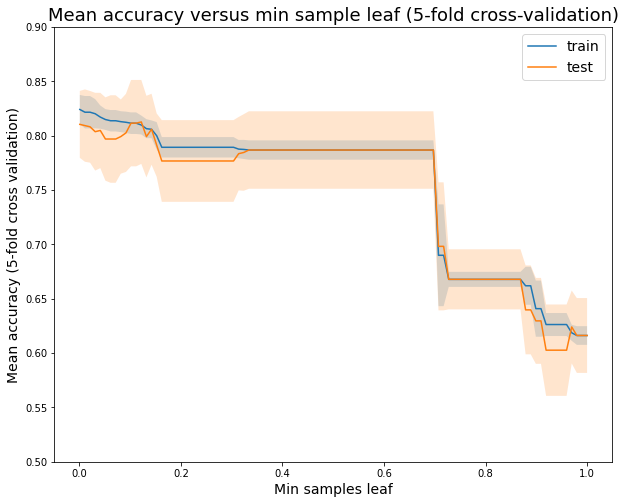

In [ ]:
folds = 5
min_samples_leaves = np.linspace(0.001, 0.5, 100, endpoint=True)

'''
retain the accuracy for test and train in a 3D array
lines:
  0 - train
  1 - test
columns:
  iteration through kfolds (the number of folds is set in the variable above)
depth of array:
  from min to max depth of our Trees  
'''
accuracy = np.zeros((2, folds, min_samples_splits.shape[0]), dtype=float)

i=0
#we are only interested in depth 3 -> 14 (incl.)
for min_samples_leaf in min_samples_leaves:
  # create the tree model and set max depth
  kfoldtree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, max_depth=4)

  cv = KFold(folds, random_state=1, shuffle=True)

  cv_results = cross_validate(kfoldtree, X_scaled, y, scoring='accuracy', cv=cv, return_train_score=True)

  '''
  cv_results contains: fit_time, score_time, test_score and train_score. 
  we are only interested in the last two
  '''
  accuracy[0,:,i] = cv_results['train_score']
  accuracy[1,:,i] = cv_results['test_score']
  i+=1

accuracy_mean = np.mean(accuracy, axis=1)
accuracy_std = np.std(accuracy, axis=1)


fig = plt.figure(figsize=(10,8))

plt.plot(min_samples_splits, accuracy_mean[0,:], '-', label='train')
plt.fill_between(min_samples_splits, accuracy_mean[0,:]-accuracy_std[0,:], accuracy_mean[0,:]+accuracy_std[0,:], alpha = 0.2)

plt.plot(min_samples_splits, accuracy_mean[1,:], '-',  label='test')
plt.fill_between(min_samples_splits, accuracy_mean[1,:]-accuracy_std[1,:], accuracy_mean[1,:]+accuracy_std[1,:], alpha = 0.2)

plt.legend(fontsize=14)

plt.xlabel('Min samples leaf', fontsize=14)

plt.ylabel(f'Mean accuracy ({folds}-fold cross validation)', fontsize=14)
plt.ylim([0.5,0.9])

plt.title(f'Mean accuracy versus min sample leaf ({folds}-fold cross-validation)', fontsize=18)

plt.show()

### 8. Post-pruning with cost complexity ###

 Cost complexity pruning provides another option to control the size of a tree (to prevent overfitting).  
 The method is parameterized by: cost complexity parameter (ccp_alpha).  
 Higher ccp_alpha => more nodes are pruned.  
 Choosing the right ccp_alpha based on validation scores:   

Text(0.5, 1.0, 'Total Impurity versus effective alpha for training set')

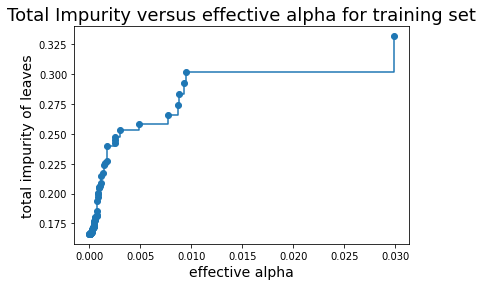

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha", fontsize=14)
ax.set_ylabel("total impurity of leaves", fontsize=14)
ax.set_title("Total Impurity versus effective alpha for training set", fontsize=18)

We train decision trees using the effective alphas from the section above.  

In [ ]:
'''
Need to look more into this: we are getting one negative alpha value
If we don't remove it now, the following section will output an error: alpha cannot be negative
Don't know why we are getting negative alpha though
'''
print(ccp_alphas.shape)
ccp_alphas = ccp_alphas[ccp_alphas>=0]
print(ccp_alphas.shape)

(71,)
(70,)


In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.14240922624956154


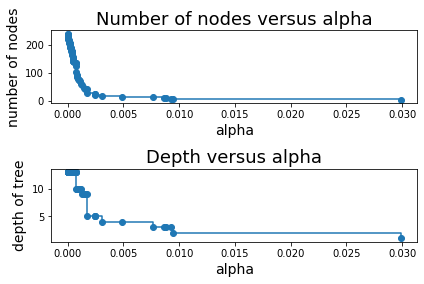

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha", fontsize=14)
ax[0].set_ylabel("number of nodes", fontsize=14)
ax[0].set_title("Number of nodes versus alpha", fontsize=18)
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha", fontsize=14)
ax[1].set_ylabel("depth of tree", fontsize=14)
ax[1].set_title("Depth versus alpha", fontsize=18)
fig.tight_layout()

The effect of alpha on accuracy in train and test sets

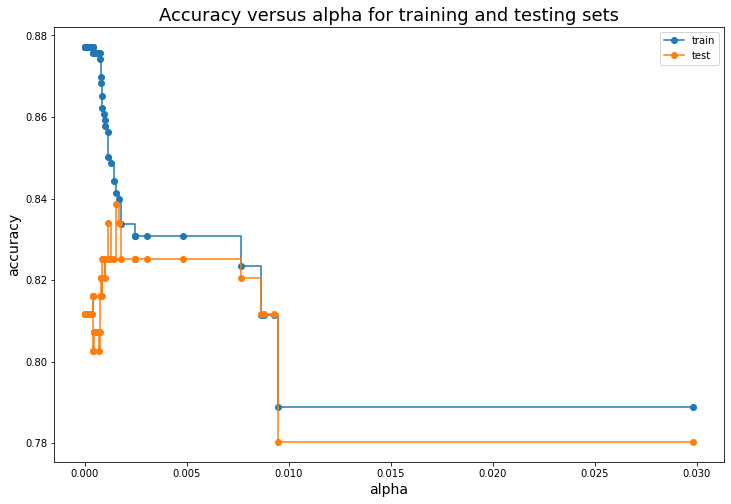

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig = plt.figure(figsize=(12,8))
plt.xlabel("alpha", fontsize=14)
plt.ylabel("accuracy", fontsize=14)
plt.title("Accuracy versus alpha for training and testing sets", fontsize=18)
plt.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
plt.legend()
plt.show()

## 4.2 Naive Bayes

In [ ]:
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from time import time

In [ ]:
features = ['Pclass', 'SibSp', 'Parch', 'FareType', 'SexCode', 'Age_cat', 'Embarked_code']

In [ ]:
X = train_cleaned.drop(['Survived'], axis=1)
stdscale=StandardScaler()
X_scaled = stdscale.fit_transform(X)
y = train_cleaned.Survived.copy()
X_scaled

array([[ 0.83,  0.43, -0.47, ..., -0.74, -0.4 ,  0.57],
       [-1.57,  0.43, -0.47, ...,  1.36,  0.82, -1.01],
       [ 0.83, -0.47, -0.47, ...,  1.36, -0.4 ,  0.57],
       ...,
       [ 0.83,  0.43,  2.01, ...,  1.36, -0.4 ,  0.57],
       [-1.57, -0.47, -0.47, ..., -0.74, -0.4 , -1.01],
       [ 0.83, -0.47, -0.47, ..., -0.74, -0.4 , -2.58]])

In [ ]:
X.corr()

,Pclass,SibSp,Parch,FareType,SexCode,Age_cat,Embarked_code
Pclass,1.000000,0.083081,0.018443,-0.594898,-0.131900,-0.419593,-0.045702
SibSp,0.083081,1.000000,0.414838,0.402066,0.114631,-0.228661,0.059961
Parch,0.018443,0.414838,1.000000,0.394411,0.245489,-0.151666,0.078665
FareType,-0.594898,0.402066,0.394411,1.000000,0.247029,0.112777,0.006450
SexCode,-0.131900,0.114631,0.245489,0.247029,1.000000,-0.074045,-0.116569
Age_cat,-0.419593,-0.228661,-0.151666,0.112777,-0.074045,1.000000,0.050496
Embarked_code,-0.045702,0.059961,0.078665,0.006450,-0.116569,0.050496,1.000000


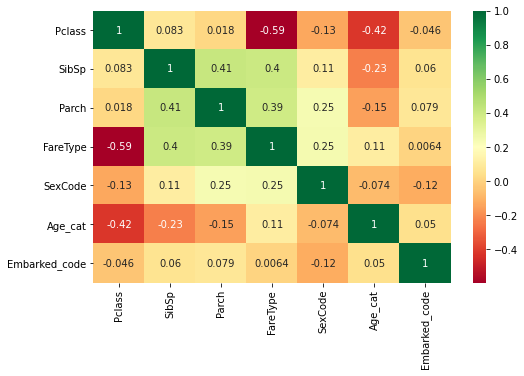

In [ ]:
plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [ ]:
import math
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper


percents = [truncate(i*0.1, 1) for i in range(1,10)]
percents

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
#fiting the model
#model with diferent percentages of train data (from 10% to 90%)
#The experiment is repeated 100 times for each training split
list_of_time = []
acc_list = []
mcc_list = []

def Average(lst): 
    return sum(lst) / len(lst) 

percentages = [truncate(i*0.1, 1) for i in range(1,10)]
percentages.reverse()

X_t, X_val, Y_t, Y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=12)

for p in percentages:
  time_l = []
  acc_l = []
  mcc_l = []
  for i in range(100):
    X_train, X_v, Y_train, Y_v = train_test_split(X_t, Y_t, test_size=p, random_state=12)
    #building the model
    model = GaussianNB()
    t0 = time()
    model.fit(X_train, Y_train)
    time_l.append(time()-t0)
    y_pred = model.predict(X_val)
    acc_l.append(metrics.accuracy_score(Y_val, y_pred))
    mcc_l.append(metrics.matthews_corrcoef(Y_val, y_pred))
  print("Model parameters for : ", truncate((1-p)*100, 1), "%")
  time_l.remove(max(time_l))
  time_l.remove(min(time_l))
  t = Average(time_l)
  list_of_time.append(truncate(t*1000, 3))
  print("Training Time: ", t, "s", sep='')
  acc_l.remove(max(acc_l))
  acc_l.remove(min(acc_l))
  acc = Average(acc_l)
  acc_list.append(acc)
  print("Accuracy:", acc)
  mcc_l.remove(max(mcc_l))
  mcc_l.remove(min(mcc_l))
  mcc = Average(mcc_l)
  mcc_list.append(mcc)
  print("MCC:", mcc)


Model parameters for :  9.9 %
Training Time: 0.000478710447038923s
Accuracy: 0.6871508379888256
MCC: 0.35872671117481836
Model parameters for :  19.9 %
Training Time: 0.0005328825541904994s
Accuracy: 0.7486033519553088
MCC: 0.4943387667189469
Model parameters for :  30.0 %
Training Time: 0.0005155899086777045s
Accuracy: 0.7318435754189934
MCC: 0.45289551344721696
Model parameters for :  40.0 %
Training Time: 0.0005277370919986647s
Accuracy: 0.7597765363128498
MCC: 0.5111955904315059
Model parameters for :  50.0 %
Training Time: 0.0005558412902209223s
Accuracy: 0.7765363128491611
MCC: 0.5468354430379756
Model parameters for :  60.0 %
Training Time: 0.0005915213604362644s
Accuracy: 0.7486033519553088
MCC: 0.49642407514155945
Model parameters for :  70.0 %
Training Time: 0.0005780434121890944s
Accuracy: 0.7486033519553088
MCC: 0.49642407514155945
Model parameters for :  80.0 %
Training Time: 0.0006066268804121991s
Accuracy: 0.7486033519553088
MCC: 0.49875426511243165
Model parameters for 

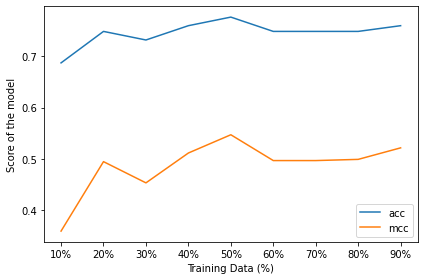

In [ ]:
p = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%']
plt.plot(p, acc_list, label='acc')
plt.plot(p, mcc_list, label='mcc')
plt.legend(loc='best')
plt.xlabel('Training Data (%)')
plt.ylabel('Score of the model')
plt.tight_layout()
plt.show()

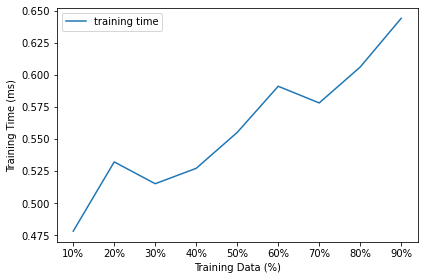

In [ ]:
plt.plot(p, list_of_time, label='training time')
plt.legend(loc='best')
plt.xlabel('Training Data (%)')
plt.ylabel('Training Time (ms)')
plt.tight_layout()
plt.show()

In [ ]:
#from 10% to 90% (Training Time in ms)
list_of_time

[0.478, 0.532, 0.515, 0.527, 0.555, 0.591, 0.578, 0.606, 0.644]

In [ ]:
#from 10% to 90%
acc_list

[0.6871508379888256,
 0.7486033519553088,
 0.7318435754189934,
 0.7597765363128498,
 0.7765363128491611,
 0.7486033519553088,
 0.7486033519553088,
 0.7486033519553088,
 0.7597765363128498]

In [ ]:
#from 10% to 90%
mcc_list

[0.35872671117481836,
 0.4943387667189469,
 0.45289551344721696,
 0.5111955904315059,
 0.5468354430379756,
 0.49642407514155945,
 0.49642407514155945,
 0.49875426511243165,
 0.5212591840575111]

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=12)
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Probability of each class
print('Not Survived: %.2f' % model.class_prior_[0])
print('Survived: %.2f' % model.class_prior_[1])

Not Survived: 0.63
Survived: 0.37


In [ ]:
#Mean of each feature per class
print('Not Survived: %s' % model.theta_[0])
print('Survived: %s' % model.theta_[1])

Not Survived: [ 0.27 -0.01 -0.12 -0.28 -0.46  0.    0.08]
Survived: [-0.49 -0.08  0.11  0.38  0.69 -0.04 -0.12]


In [ ]:
#Standard deviations of each feature per class
print('Not Survived: %s' % model.sigma_[0])
print('Survived: %s' % model.sigma_[1])

Not Survived: [0.76 1.31 0.92 0.9  0.52 0.92 0.93]
Survived: [1.02 0.42 0.95 0.98 0.95 1.04 1.07]


In [ ]:
#cross validation score
kfold = KFold(n_splits=10, shuffle = True, random_state=1)
cv_result_nb = cross_val_score(model,X_scaled, y, cv=kfold, scoring = "accuracy")
print("Mean accuracy of kfold", cv_result_nb.mean()) # mean accuracy of kfold

Mean accuracy of kfold 0.7621223470661673


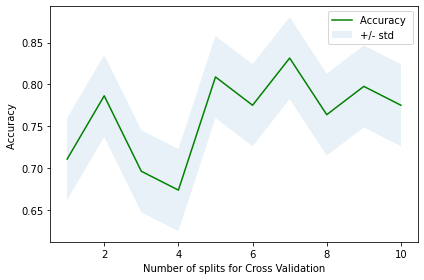

In [ ]:
std_kfold = cv_result_nb.std()
plt.plot(range(1,11),cv_result_nb,'g')
plt.fill_between(range(1,11),cv_result_nb - 1 * std_kfold,cv_result_nb + 1 * std_kfold, alpha=0.10)
plt.legend(('Accuracy ', '+/- std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of splits for Cross Validation')
plt.tight_layout()
plt.show()

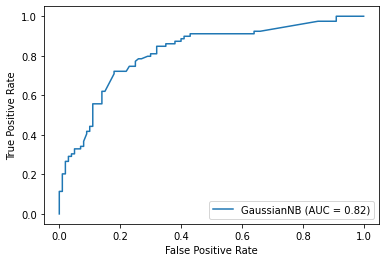

In [ ]:
metrics.plot_roc_curve(model, X_val, Y_val)
plt.show()

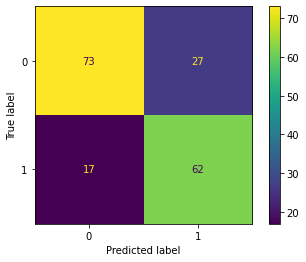

In [ ]:
metrics.plot_confusion_matrix(model, X_val, Y_val)
plt.show()

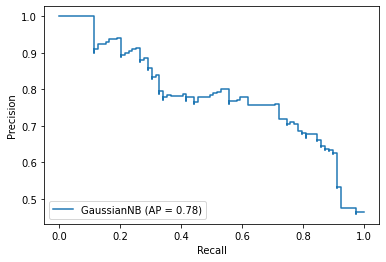

In [ ]:
metrics.plot_precision_recall_curve(model, X_val, Y_val)
plt.show()

#Submission of the results 

In [ ]:
test_ids = test['PassengerId'].values
#Naive Bayes
test_predictions = model.predict(test_cleaned)
submission = pd.DataFrame({'PassengerId': test_ids})
submission['Survived'] = test_predictions.astype('int')
submission.to_csv('submission.csv', index=False)
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [ ]:
list_of_time = []
acc_list = []
mcc_list = []
mcc_list
for i in range(1,8):
  time_l = []
  acc_l = []
  mcc_l = []
  for j in range(100):
    X_train, X_val, Y_train, Y_val = train_test_split(X_scaled[:,:i], y, test_size=0.2, random_state=12)
    #building the model
    model = GaussianNB()
    t0 = time()
    model.fit(X_train, Y_train)
    time_l.append(time()-t0)
    y_pred = model.predict(X_val)
    acc_l.append(metrics.accuracy_score(Y_val, y_pred))
    mcc_l.append(metrics.matthews_corrcoef(Y_val, y_pred))
  print("Model parameters for : ", i, " features")
  time_l.remove(max(time_l))
  time_l.remove(min(time_l))
  t = Average(time_l)
  list_of_time.append(truncate(t*1000, 3))
  print("Training Time: ", t, "s", sep='')
  acc_l.remove(max(acc_l))
  acc_l.remove(min(acc_l))
  acc = Average(acc_l)
  acc_list.append(acc)
  print("Accuracy:", acc)
  mcc_l.remove(max(mcc_l))
  mcc_l.remove(min(mcc_l))
  mcc = Average(mcc_l)
  mcc_list.append(mcc)
  print("MCC:", mcc)

Model parameters for :  1  features
Training Time: 0.0005357703384088011s
Accuracy: 0.6312849162011175
MCC: 0.23668627144616725
Model parameters for :  2  features
Training Time: 0.0005887260242384307s
Accuracy: 0.6256983240223453
MCC: 0.22602885675407014
Model parameters for :  3  features
Training Time: 0.0006118428950407067s
Accuracy: 0.6480446927374293
MCC: 0.27383644910527133
Model parameters for :  4  features
Training Time: 0.0005963797471961196s
Accuracy: 0.6480446927374293
MCC: 0.2745528835972626
Model parameters for :  5  features
Training Time: 0.0006587529669002611s
Accuracy: 0.7541899441340782
MCC: 0.5139670874160892
Model parameters for :  6  features
Training Time: 0.0006415162767682757s
Accuracy: 0.7541899441340782
MCC: 0.5139670874160892
Model parameters for :  7  features
Training Time: 0.0006301281403522102s
Accuracy: 0.7541899441340782
MCC: 0.5112630054827907


In [ ]:
list_of_time

[0.535, 0.588, 0.611, 0.596, 0.658, 0.641, 0.63]

In [ ]:
acc_list

[0.6312849162011175,
 0.6256983240223453,
 0.6480446927374293,
 0.6480446927374293,
 0.7541899441340782,
 0.7541899441340782,
 0.7541899441340782]

In [ ]:
mcc_list

[0.23668627144616725,
 0.22602885675407014,
 0.27383644910527133,
 0.2745528835972626,
 0.5139670874160892,
 0.5139670874160892,
 0.5112630054827907]

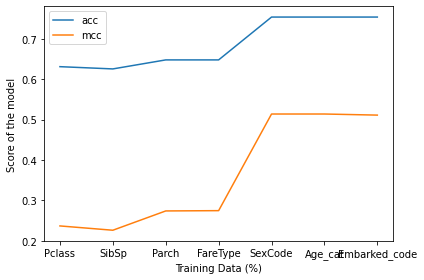

In [ ]:
plt.plot(features, acc_list, label='acc')
plt.plot(features, mcc_list, label='mcc')
plt.legend(loc='best')
plt.xlabel('Training Data (%)')
plt.ylabel('Score of the model')
plt.tight_layout()
plt.show()

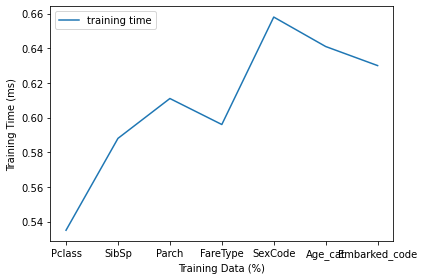

In [ ]:
plt.plot(features, list_of_time, label='training time')
plt.legend(loc='best')
plt.xlabel('Training Data (%)')
plt.ylabel('Training Time (ms)')
plt.tight_layout()
plt.show()